### Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
# Step 1: Importing neccesary liabraries
import numpy as np 
import pandas as pd 
# data visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
# import warnings to ignore pop-up messages
import warnings
warnings.filterwarnings('ignore')
# Importing Logging create logs to based on Timestamp
from sklearn.linear_model import LogisticRegression

import time
from loguru import logger

# load the dataset using pandas function

In [3]:
data = pd.read_csv('Mall_Customers 2nd task.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
numerical_col = data.select_dtypes(exclude = 'object').columns
categorical_col = data.select_dtypes(include = 'object').columns

from collections import OrderedDict

stats = [] 

for i in numerical_col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1

    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':data[i].count(),
        'Mean':data[i].mean(),
        'Median':data[i].median(),
        'Q1':Q1,
        'Q3':Q3,
        'IQR':IQR,
        'Maximum':data[i].max(),
        'Minimum':data[i].min(),
        'Skewness':data[i].skew(),
        'Kurtosis':data[i].kurt(),
        'Standard Deviation':data[i].std(),
        'Outliers': data[(data[i] < Q1 - 1.5 * IQR) | (data[i] > Q3 + 1.5 * IQR)][i].count()
    })
    stats.append(numerical_stats)
    report =pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Q1,Q3,IQR,Maximum,Minimum,Skewness,Kurtosis,Standard Deviation,Outliers
0,CustomerID,200,100.50,100.5,50.75,150.25,99.50,200,1,0.000000,-1.200000,57.879185,0
1,Age,200,38.85,36.0,28.75,49.00,20.25,70,18,0.485569,-0.671573,13.969007,0
2,Annual Income (k$),200,60.56,61.5,41.50,78.00,36.50,137,15,0.321843,-0.098487,26.264721,2
3,Spending Score (1-100),200,50.20,50.0,34.75,73.00,38.25,99,1,-0.047220,-0.826629,25.823522,0


### cluster
* split data for clustering

In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)


## Kmeans
* K-Means is an unsupervised machine learning algorithm used to group similar data points into clusters based on their features.
* It helps identify patterns or customer segments (like high or low spenders) without predefined labels, making it ideal for customer segmentation and market analysis.

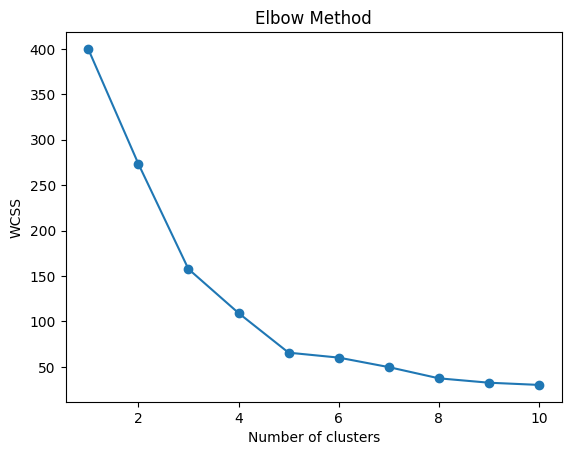

In [8]:
from sklearn.cluster import KMeans
wcss = []  # within-cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scalar)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Kmeans Clustering Used

In [10]:
k = 5  # optimal clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scalar)

data['Cluster'] = clusters
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


### Each cluster represents a group of customers with similar spending behavior.

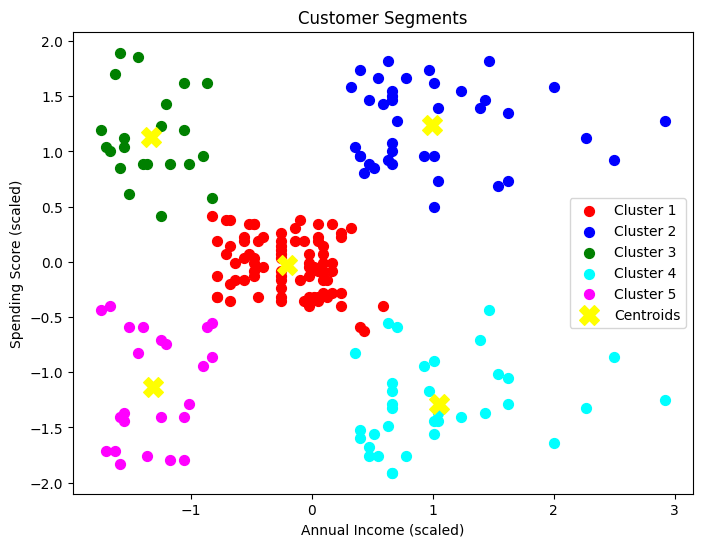

In [11]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(k):
    plt.scatter(
        X_scalar[clusters==i,0],
        X_scalar[clusters==i,1],
        s=50,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    c='yellow',
    marker='X',
    label='Centroids'
)

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.legend()
plt.show()


# Conclusion
* Kmeans It helps identify patterns or customer segments (like high or low spenders) without predefined labels, making it ideal for customer segmentation and market analysis.
* The model successfully identified 5 unique customer segments
* enabling data-driven insights for targeted marketing strategies and personalized promotions.
* Used the Elbow Method to find the optimal number of clusters (k = 5).
* Applied K-Means to segment customers into distinct behavioral groups.
* Visualized clusters to identify customer types such as high spenders, average customers, and low spenders.